# Optimización de funciones de prueba mediante algorítmos genéticos

In [4]:
import random
import numpy as np
from binaryga import * # implementación de algoritmos genéticos
import matplotlib.pyplot as plt
from mainga import bincode_ga
import testfunctions
from math import *
%matplotlib inline

In [5]:
func_obj = testfunctions.rastring
parametros = { "precis": 4,
                   "lim_inf": func_obj.vars_range[0],
                   'lim_sup': func_obj.vars_range[1],
                   'num_vars': 2,
                   'test_function': func_obj,
                   'size_population': 150,
                   'p_crosover': 0.5,
                   'p_mutation': 0.2,
                   'max_num_generations': 200,
                   'len_elite': 0 ,
                   'tol_time': None,
                   'plotting': False
                   }

last_generation, \
    worst_apt_per_generation, \
    mean_apt_per_generation, \
    best_apt_per_generation = bincode_ga(**parametros)


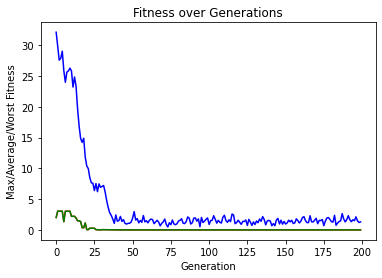

In [6]:
plt.plot(best_apt_per_generation, color='red')
plt.plot(mean_apt_per_generation, color='blue')
plt.plot(worst_apt_per_generation, color='green')
plt.xlabel('Generation')
plt.ylabel('Max/Average/Worst Fitness')
plt.title('Fitness over Generations')
plt.show()

In [23]:
last_generation.sort(key=lambda x : x.val )
[ind.val for ind in last_generation][:10]

[6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07,
 6.054538417288313e-07]

# gráfica de población

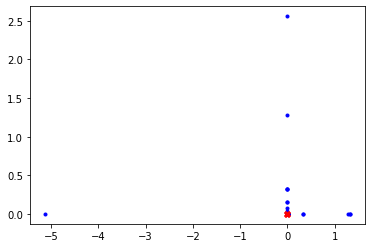

In [8]:
plt.figure(1)
globalMinima = func_obj.minima
phenotype_last_gen = [ind.fenotipo for ind in last_generation]
plt.scatter(*zip(*globalMinima), marker='X', color='red',zorder=1)
plt.scatter(*zip(*phenotype_last_gen), marker='.', color='blue',zorder=0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

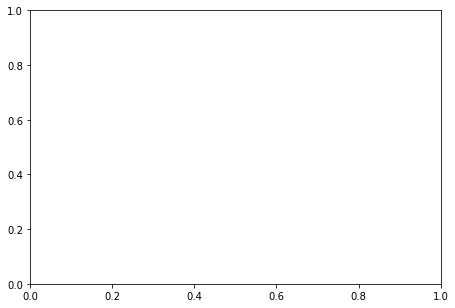

In [24]:

n = 256
x = [ind.fenotipo[0] for ind in last_generation]
y = [ind.fenotipo[1] for ind in last_generation]
X,Y = np.meshgrid(x, y)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, func_obj(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, func_obj(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([])
plt.yticks([])
plt.show()


In [26]:
X.shape

(150, 150)

## Función de Rastring 
$$ f(\mathbf{x}) = A n + \sum_{i=1}^n \left[x_i^2 - A\cos(2 \pi x_i)\right]$$
$$ \text{where: }  A=10 $$

**Mínimo global**
$ f(0, \dots, 0) = 0f(0, \dots, 0) = 0$

**Espacio de búsqueda**
$ -5.12\le x_{i} \le 5.12 -5.12\le x_{i} \le 5.12 $

In [10]:
def rastring(*args)->float:
    '''
    función Rastring para n variables
    '''
    A = 10
    n = len(args)
    return A*n + fsum([x_i**2 - A*cos(2*pi*x_i) for x_i in args ]) 

rastring.minima=[ (0,0) ] # TODO: definir para mayor dimensión
rastring.b_low, rastring.b_up = -5.12, 5.12


In [11]:
P =np.array(np.linspace(-5.12,5.12,100),np.linspace(-5,12,5.12,100))


TypeError: 'float' object cannot be interpreted as an integer

In [9]:
BOUND_LOW, BOUND_UP = -5.12, 5.12

### Dos variables

In [30]:
DIMENSIONS = 2

In [ ]:
## 

### Cinco variables

### $n$-variables

## Función Rosenbrock
$$f(\boldsymbol{x}) = \sum_{i=1}^{n-1} \left[ 100 \left(x_{i+1} - x_{i}^{2}\right)^{2} + \left(1 - x_{i}\right)^{2}\right]$$
**Mínimo Global**

$\text{Min} =
\begin{cases}
n=2 & \rightarrow \quad f(1,1) = 0, \\
n=3 & \rightarrow \quad f(1,1,1) = 0, \\
n>3 & \rightarrow \quad f(\underbrace{1,\dots,1}_{n \text{ times}}) = 0 \\
\end{cases}\text{Min} =
\begin{cases}
n=2 & \rightarrow \quad f(1,1) = 0, \\
n=3 & \rightarrow \quad f(1,1,1) = 0, \\
n>3 & \rightarrow \quad f(\underbrace{1,\dots,1}_{n \text{ times}}) = 0 \\
\end{cases}$

**Espacio de Búsqueda**



In [21]:
def rosenbrock(*args):
    x = args
    if not all([ abs(x_i) <= 5 for x_i in x ]):
        raise ValueError
    return fsum([100*(x[i+1] - x[i]**2)**2 + (1-x[i])**2 for i in range(len(x)-1) ] )

rosenbrock.minima = [ (1,1) ]

## Función de Himmelblau
$$ f(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2.\quad $$

**Mínimo global:**

$
\text{Min} =
\begin{cases}
      f\left(3.0,  2.0\right) & = 0.0 \\
      f\left(-2.805118, 3.131312\right) & = 0.0 \\
      f\left(-3.779310, -3.283186\right) & = 0.0 \\
      f\left(3.584428, -1.848126\right) & = 0.0 \\
\end{cases}$

**Espacio de Búsqueda:** $-5\le x,y \le 5$

In [15]:
def himmelblau(*args):
    x,y = args[0], args[1]
    if not (abs(x) <= 5 and abs(y) <= 5 ):
        raise ValueError
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

## Función Eggholder

$$ f(x,y) = - \left(y+47\right) \sin \sqrt{\left|\frac{x}{2}+\left(y+47\right)\right|} - x \sin \sqrt{\left|x - \left(y + 47 \right)\right|} $$

**Mínimo global:**
    
$f(512, 404.2319) = -959.6407$

**Espacio de Búsqueda**

$-512\le x,y \le 512 $

In [ ]:
def eggholder(*args):
    x,y = args[0], args[1]
    if not (abs(x) <= 512 and abs(y) <= 512 ):
        raise ValueError
    return -(y+47)*sin(sqrt(abs(x/2 + (y+47))) - x*sin(sqrt(abs(x-(y+47))))

In [18]:
sin(3)

0.1411200080598672

In [ ]:
from numpy import random
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(random.permutation(arr))

In [ ]:
num_ind = 10
len_gen = 10
pob = [ Individuo(rand_bin_gen( 10), rastring_2var) for i in range(num_ind) ]
pool = torneo_sin_remplazo( pob)

In [ ]:
pool=np.random.permutation(pob)
pool[0].val

In [5]:
np.cos(3)

-0.9899924966004454

In [9]:
cos(3)


-0.9899924966004454

In [ ]:
np